# Analyzing borrowers’ risk of defaulting

Our project is to prepare a report for a bank’s loan division. We need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Our report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

We need to test the following hypothesises:

•	Is there a connection between having kids and repaying a loan on time?

•	Is there a connection between marital status and repaying a loan on time?

•	Is there a connection between income level and repaying a loan on time?

•	How do different loan purposes affect on-time loan repayment?



## Open the data file and have a look at the general information. 



In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt

# Load the data

try:
    df = pd.read_csv('credit_scoring_eng.csv')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv')



## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan



Let's explore our data and check for potential issues with the data.

In [2]:
# Let's see how many rows and columns our dataset has

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


From the info about our dataset we can see that there are 21525 rows in it, but the 'days_employed' and 'total_income' have 19351 rows. They may be missed in the same rows.

In [3]:
# let's print the first N rows

df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


# Get info on data
There are several issues indetified with the data:
1. Days employed are negative
2. Equal education degrees are written in different cases
3. Some data are missed (empty boxes in total_income and days_employed columns)
4. Negative data in children column


In [4]:
# Let's look in the filtered table at the first column with missing data

df.isna().sum()


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Missed data described above can be symmetric. Having counted the missing values in all rows with missing values we noticed that the missing samples are of the same size.


In [5]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.

missing_values = df[df['days_employed'].isna()&df['total_income'].isna()]

missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


**Intermediate conclusion**

The number of rows in the filtered table matches the number of missing values - we can make a conclusion that they are missed in the same rows.

Let's calculate the percentage of the missing values compared to the whole dataset. 

Let's try to investigate if there is some common criteria for those people with missing values in our data. 
We will take this group and check how the data that are not missing are distributed in it.

In [6]:
# Let's calculate the percentage of the missing values compared to the whole dataset

print("{:.0%}".format(df['total_income'].isna().sum()/df['children'].count()))

10%


10% of total is considerably large piece of data. We probably need to fill the missing values.
They could be due to specific client characteristics, such as education level. 


In [7]:
# Let's investigate clients who do not have data on identified characteristic and the column with the missing values

df[df['days_employed'].isna()].describe().loc[['mean', 'min', 'max'],:]


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
mean,0.552438,NaN,43.632015,0.800828,0.975161,0.078197,NaN
min,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
max,20.000000,NaN,73.000000,3.000000,4.000000,1.000000,NaN


In [8]:
# Checking distribution

missing_values['education'].value_counts(normalize=True)

secondary education    0.647654
bachelor's degree      0.228151
SECONDARY EDUCATION    0.030819
Secondary Education    0.029899
some college           0.025299
Bachelor's Degree      0.011500
BACHELOR'S DEGREE      0.010580
primary education      0.008740
SOME COLLEGE           0.003220
Some College           0.003220
Primary Education      0.000460
PRIMARY EDUCATION      0.000460
Name: education, dtype: float64

We have not identified any particular dependance of missing values on education level.

**Possible reasons for missing values in data**

The data might have been missed randomly because of inaccuracy during their collection. 

We will compare frequiancy of each parameter of education level in missing rows and in the whole dataset.

In [9]:
# Checking the distribution in the whole dataset

df['education'].value_counts(normalize=True)   

secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
GRADUATE DEGREE        0.000046
Graduate Degree        0.000046
Name: education, dtype: float64

**Intermediate conclusion**

The distribution in the original dataset is similar to the distribution of the filtered table. It means that no particular characteristics of rows with missing data exist.


**Conclusions**

No specific patterns were identified. We have checked distributions for the whole dataset as well as for missing ones, they are similar.

10% of data in missing columns is a probable subject for filling them in. 
It's may be not a good idea to fill in the total_income column because we don't actually know the reason why they are missed (may be there is no income at all). Filling in the income data could lead to abnormal data deviations and wrong conclusions.

Days employed should be probably filled in with the mean values by corresponding categories of age groups.

Also we need to transform our data - to remove duplicates, to correct names with different registers, to change unclear names.


## Data transformation

Let's go through each column to see what issues we may have in them.

Let's remove duplicates and fix educational information if required.

In [10]:
# Let's see all values in education column to check if and what spellings will need to be fixed

df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [11]:
# Fix the registers and add a column with updated education names

df['education_lowercase'] = df['education'].str.lower()
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,education_lowercase
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,bachelor's degree
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,secondary education
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,secondary education
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,secondary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,secondary education
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,bachelor's degree
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,bachelor's degree
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education,secondary education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding,bachelor's degree
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,secondary education


In [12]:
# Checking all the values in the column to make sure we fixed them

df['education_lowercase'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

Check the data in the `children` column

In [13]:
# Let's see the distribution of values in the `children` column
df['children'].value_counts(normalize=True)

 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

There is incorrect data value equal to '-1'. This can be a misprint of '1'.

Another strange value is '20'. This also can be a misprint (adding '0' after '2' by mistake). It's difficult to imagine that this amount of children is more popular than 4 of 5. Let's change '20' to '2'


In [14]:
# Replacing incorrect data according to our description above

df = df.replace({'children':{-1:1,20:2}})

In [15]:
# Checking the `children` column again to make sure it's all fixed

df['children'].value_counts(normalize=True)

0    0.657329
1    0.226016
2    0.099001
3    0.015331
4    0.001905
5    0.000418
Name: children, dtype: float64

Let's check the `days_employed` column for adequacy. 
First we will check if there are some negative values.
Then we will divide amount of days by 365 in order to identify values that are too high (it's easier to asses in years)


In [16]:
# Let's find problematic data in `days_employed`, if they exist, and calculate the percentage

pos = df.loc[df["days_employed"] >= 0, "days_employed"].count()  # sum of greater than 0
neg = df.loc[df["days_employed"] < 0, "days_employed"].count()


big = (df['days_employed'] / 365)
print((big>100).value_counts())
print ("{:.0%}".format(neg/(pos+neg)))

False    18080
True      3445
Name: days_employed, dtype: int64
82%


82% of days_employed are negative - it's very high percentage of problematic data.
Although there is a huge amount of too high days of employment - no one can work more than 100 years.
There must be a mistake in negative sign - we can remove them so negative figures will become positive.
Rows with unbelievably high working days could be filled in with current value divided by 100.



In [17]:
# Address the problematic values, which are negative
df.loc[ df['days_employed'] < 0, 'days_employed'] = -df['days_employed']


In [18]:
# Check the result - make sure it's fixed
df.loc[df['days_employed'] < 0, 'days_employed'].count()

0

In [19]:
# Address the problematic values which are too high
df.loc[df['days_employed']/365 > 100, 'days_employed'] = df['days_employed']/100

print((big>100).value_counts())

False    18080
True      3445
Name: days_employed, dtype: int64


Let's now look at the client's age and whether there are any issues there. 

In [20]:
# Check the `dob_years` for suspicious values and count the percentage
df['dob_years'].value_counts(normalize=True)*100



35    2.866434
40    2.829268
41    2.819977
34    2.801394
38    2.778165
42    2.773519
33    2.699187
39    2.662021
31    2.601626
36    2.578397
44    2.541231
29    2.531940
30    2.508711
48    2.499419
37    2.494774
50    2.387921
43    2.383275
32    2.369338
49    2.360046
28    2.336818
45    2.308943
27    2.290360
56    2.262485
52    2.248548
47    2.229965
54    2.225319
46    2.206736
58    2.141696
57    2.137050
53    2.132404
51    2.081301
59    2.062718
55    2.058072
26    1.895470
60    1.751452
25    1.658537
61    1.649245
62    1.635308
63    1.249710
64    1.231127
24    1.226481
23    1.180023
65    0.901278
66    0.850174
22    0.850174
67    0.775842
21    0.515679
0     0.469222
68    0.459930
69    0.394890
70    0.301974
71    0.269454
20    0.236934
72    0.153310
19    0.065041
73    0.037166
74    0.027875
75    0.004646
Name: dob_years, dtype: float64

Problematic values are those equal to '0' - 0,469% of total - they look strange as it can't be someone's age.
It seems to be just missed from the dataset - we can fill in these values with median without the isk of significant influence on the dataset.


In [21]:
# Address the issues in the `dob_years` column, if they exist

df['dob_years']=df['dob_years'].replace(0,df['dob_years'].median())

In [22]:
# Check the result - make sure it's fixed
df[df['dob_years'] == 0]['dob_years'].count()

0

Now let's check the `family_status` column. 

In [23]:
# Let's see the values for the column
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)


There are no problematic values in this column


Now let's check the `gender` column. Let's see what kind of values there are and what problems we may need to address.

In [24]:
# Let's see the values in the column
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [25]:
# Address the problematic values, if they exist
df['gender']=df['gender'].replace('XNA','Not defined') #Replacing not clear names on 'Not defined'

In [26]:
# Check the result - make sure it's fixed

df[df['gender'] == 'XNA']['gender'].count()

0

Now let's check the `income_type` column.

In [27]:
# Let's see the values in the column
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [28]:
# Address the problematic values, if they exist

#The difference between 'business' and 'entrepreneur' is not clear - but actually they must be the same. 
#So let's replace 'business' to 'entrepreneur'
df['income_type']=df['income_type'].replace('business','entrepreneur')


In [29]:
# Check the result - make sure it's fixed
df[df['income_type'] == 'business']['income_type'].count()


0

Now let's see if we have any duplicates in our data. If we do, we'll need to decide what we will do with them.

In [30]:
# Checking duplicates
print(df.duplicated().sum())


55


In [31]:
# There are 55 duplicates in our dataset - we need to remove them because they are repeated and give nothing to our analysis
df = df.drop_duplicates()

In [32]:
# Last check whether we have any duplicates
print(df.duplicated().sum())


0


In [33]:
# Check the size of the dataset that you now have after your first manipulations with it
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21470 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   children             21470 non-null  int64  
 1   days_employed        19351 non-null  float64
 2   dob_years            21470 non-null  float64
 3   education            21470 non-null  object 
 4   education_id         21470 non-null  int64  
 5   family_status        21470 non-null  object 
 6   family_status_id     21470 non-null  int64  
 7   gender               21470 non-null  object 
 8   income_type          21470 non-null  object 
 9   debt                 21470 non-null  int64  
 10  total_income         19351 non-null  float64
 11  purpose              21470 non-null  object 
 12  education_lowercase  21470 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.3+ MB


The following changes were made:

1) Removing of incorrect data (like negative amount of children and days_employed or days_employed equal to more than 100 years)

2) Changing some values that are not understandable (like XNA for gender - to 'Not defined')

3) Replacement some values which have different names but the same sence (like 'buseness' and 'eunterpeneur')

4) Creating the column with education level in lower case

5) Duplicates were removed - and the size of dataset decreased by 55 entries



# Working with missing values

To speed up working with some data, sometimes it's convinient to work with dictionaries for some values, where IDs are provided. 

Columns like 'education_id' and 'education_lowercase' could be used for dictionary creation because of single-valued correspondance between their values.

In [34]:
# Find the dictionaries

print(df['education_id'].unique())
print(df['education_lowercase'].unique())
dct = {x[0]:x[1] for x in df[['education_id','education']].values.tolist()}
print(dct)

[0 1 2 3 4]
["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']
{0: "bachelor's degree", 1: 'secondary education', 2: 'some college', 3: 'primary education', 4: 'graduate degree'}


### Restoring missing values in `total_income`

There are two columns in our dataset which have missing values - total_income and days_employed. 

We should investigate them more precisely before making decision about filling in values.

Let's start with addressing total income missing values. 


In [35]:
# Let's write a function that calculates the age category
def age_group(dob_years):
    if dob_years <= 18:
        return 'children'
    if dob_years <= 64:
        return 'adult'
    return 'retired'    

In [36]:
# Test if the function works
print(age_group(20)) 

adult


In [37]:
# Creating new column based on function
df['age_group'] = df['dob_years'].apply(age_group)


In [38]:
# Checking how values in the new column
print(df.head(10))


   children  days_employed  dob_years            education  education_id  \
0         1    8437.673028       42.0    bachelor's degree             0   
1         1    4024.803754       36.0  secondary education             1   
2         0    5623.422610       33.0  Secondary Education             1   
3         3    4124.747207       32.0  secondary education             1   
4         0    3402.660720       53.0  secondary education             1   
5         0     926.185831       27.0    bachelor's degree             0   
6         0    2879.202052       43.0    bachelor's degree             0   
7         0     152.779569       50.0  SECONDARY EDUCATION             1   
8         2    6929.865299       35.0    BACHELOR'S DEGREE             0   
9         0    2188.756445       41.0  secondary education             1   

       family_status  family_status_id gender   income_type  debt  \
0            married                 0      F      employee     0   
1            married     

Income tends to depend on several factors like education, age, type of employment. 

Let's look at mean and median values of income for data where values are not missed (depending on age group)


In [39]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
new_df = df.dropna()
new_df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,education_lowercase,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,bachelor's degree,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,secondary education,adult
2,0,5623.422610,33.0,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,secondary education,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,secondary education,adult
4,0,3402.660720,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,secondary education,adult
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,entrepreneur,0,40922.170,purchase of the house,bachelor's degree,adult
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,entrepreneur,0,38484.156,housing transactions,bachelor's degree,adult
7,0,152.779569,50.0,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education,secondary education,adult
8,2,6929.865299,35.0,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding,bachelor's degree,adult
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,secondary education,adult


In [40]:
# Look at the mean values for income based on your identified factors
new_df.groupby('age_group')['total_income'].mean()

age_group
adult      27019.065837
retired    21542.650450
Name: total_income, dtype: float64

In [41]:
# Look at the median values for income based on your identified factors
new_df.groupby('age_group')['total_income'].median()


age_group
adult      23382.756
retired    18471.391
Name: total_income, dtype: float64

In [42]:
print(new_df.groupby('education_lowercase')['total_income'].median())
print(new_df.groupby('education_lowercase')['total_income'].mean())

education_lowercase
bachelor's degree      28054.5310
graduate degree        25161.5835
primary education      18741.9760
secondary education    21836.5830
some college           25618.4640
Name: total_income, dtype: float64
education_lowercase
bachelor's degree      33142.802434
graduate degree        27960.024667
primary education      21144.882211
secondary education    24594.503037
some college           29045.443644
Name: total_income, dtype: float64


We have calculated mean and median values for total income based on age group and education.

But actually we don't know the reasons why these data are missed. Coresponding people may not have any income at all.

So the best decision will be not to fill in these rows.



In [43]:
# Let's check values per grouped categories (based on income_type)

print(new_df.groupby('income_type')['total_income'].median())
print(new_df.groupby('income_type')['total_income'].mean())

income_type
civil servant                  24071.6695
employee                       22815.1035
entrepreneur                   27583.3600
paternity / maternity leave     8612.6610
retiree                        18962.3180
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64
income_type
civil servant                  27343.729582
employee                       25820.841683
entrepreneur                   32397.165026
paternity / maternity leave     8612.661000
retiree                        21940.394503
student                        15712.260000
unemployed                     21014.360500
Name: total_income, dtype: float64


In [44]:
#  Write a function that we will use for filling in missing values
median_civil_servant = new_df[new_df['income_type'] == 'civil servant']['total_income'].median()
median_employee = new_df[new_df['income_type'] == 'employee']['total_income'].median()
median_entrepreneur = new_df[new_df['income_type'] == 'entrepreneur']['total_income'].median()
median_paternity_maternity = new_df[new_df['income_type'] == 'paternity / maternity leave']['total_income'].median()
median_retiree = new_df[new_df['income_type'] == 'retiree']['total_income'].median()
median_student = new_df[new_df['income_type'] == 'student']['total_income'].median()
median_unemployed = new_df[new_df['income_type'] == 'unemployed']['total_income'].median()
def fill_total_income(row):
    income_type = row.income_type
    total_income = row.total_income
    if pd.isna(total_income):
        if income_type == 'civil servant':
            return median_civil_servant
        elif income_type == 'employee':
            return median_employee
        elif income_type == 'entrepreneur':
            return median_entrepreneur
        elif income_type == 'paternity / maternity leave':
            return median_paternity_maternity
        elif income_type == 'retiree':
            return median_retiree
        elif income_type == 'student':
            return median_student
        else:
            return median_unemployed
    return total_income

In [45]:
# Check if it works
row = df.iloc[0,:]
print(fill_total_income(row)) 

40620.102


In [46]:
# Apply function to the income_type
df['total_income'] = df.apply(fill_total_income, axis = 1)
df[df['total_income'].isna()].shape

(0, 14)

In [47]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,education_lowercase,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,bachelor's degree,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,secondary education,adult
2,0,5623.422610,33.0,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,secondary education,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,secondary education,adult
4,0,3402.660720,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,secondary education,adult
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,entrepreneur,0,40922.170,purchase of the house,bachelor's degree,adult
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,entrepreneur,0,38484.156,housing transactions,bachelor's degree,adult
7,0,152.779569,50.0,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education,secondary education,adult
8,2,6929.865299,35.0,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding,bachelor's degree,adult
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,secondary education,adult


###  Restoring values in `days_employed`

Let's identified parameters that may help to restore the missing values in this column. 

Let's calculate median and mean values based on age group.

In [48]:
# Distribution of `days_employed` medians based on your identified parameters

new_df.groupby('age_group')['days_employed'].median()

age_group
adult      2050.159363
retired    3646.615594
Name: days_employed, dtype: float64

In [49]:
# Distribution of `days_employed` means based on your identified parameters

new_df.groupby('age_group')['days_employed'].mean()

age_group
adult      2534.277098
retired    3708.694906
Name: days_employed, dtype: float64

<AxesSubplot:>

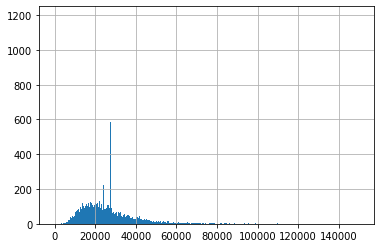

In [50]:
# Let's see the distribution of values in days_employed column
df['total_income'].hist(bins=1000, range=(0, 150000)) 

We can see from the graphic above that the distribution is far from normal and has significant outliers. 

So based on this it's probably good idea to take a median value (depending on age group, for example) for filling in missing values.

In [51]:
# Let's write a function that calculates means or medians (depending on your decision) based on your identified parameter
median_adult = new_df[new_df['age_group'] == 'adult']['days_employed'].median()
median_retired = new_df[new_df['age_group'] == 'retired']['days_employed'].median()
def fill_days_employed(row):
    age_group = row.age_group
    days_employed = row.days_employed
    if pd.isna(days_employed):
        if age_group == 'adult':
            return median_adult
        else:
            return median_retired
    return days_employed

In [52]:
# Check that the function works
row = df.iloc[0,:]
print(fill_days_employed(row)) 

8437.673027760233


In [53]:
# Apply function to the age_group
df['days_employed'] = df.apply(fill_days_employed, axis = 1)
df[df['days_employed'].isna()].shape



(0, 14)

In [54]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,education_lowercase,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,bachelor's degree,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,secondary education,adult
2,0,5623.422610,33.0,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,secondary education,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,secondary education,adult
4,0,3402.660720,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,secondary education,adult
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,entrepreneur,0,40922.170,purchase of the house,bachelor's degree,adult
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,entrepreneur,0,38484.156,housing transactions,bachelor's degree,adult
7,0,152.779569,50.0,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education,secondary education,adult
8,2,6929.865299,35.0,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding,bachelor's degree,adult
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,secondary education,adult


In [55]:
# Check the entries in all columns - make sure we fixed all missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21470 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   children             21470 non-null  int64  
 1   days_employed        21470 non-null  float64
 2   dob_years            21470 non-null  float64
 3   education            21470 non-null  object 
 4   education_id         21470 non-null  int64  
 5   family_status        21470 non-null  object 
 6   family_status_id     21470 non-null  int64  
 7   gender               21470 non-null  object 
 8   income_type          21470 non-null  object 
 9   debt                 21470 non-null  int64  
 10  total_income         21470 non-null  float64
 11  purpose              21470 non-null  object 
 12  education_lowercase  21470 non-null  object 
 13  age_group            21470 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 2.5+ MB


## Categorization of data
To answer the question about the connection between different loan purposes and on-time loan repayment we need to categorize data in the 'purpose' column.

There are different purposes bu actually all of them can be described with 4 types of purposes. Let's look at the current list of purposes.



In [56]:
# Print the values for purposes
df['purpose'].unique()


array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

We can identfy the following groups of purposes:
- to buy a car

- to by a real estate

- to study

- to celebrate a wedding

Let's categoize our data based on these themes.


In [57]:
# Let's write a function to categorize the data based on common topics

def purpose_categorised(purpose):
    if 'car' in purpose:
        return 'car'
    if 'house' in purpose:
        return 'real estate'
    if 'estate' in purpose:
        return 'real estate'
    if 'property' in purpose:
        return 'real estate'
    if 'hous' in purpose:
        return 'real estate'
    if 'educat' in purpose: 
        return 'education'
    if 'university' in purpose: 
        return 'education'
    return 'wedding'

In [58]:
# Check that function works

print(purpose_categorised('going to university'))

education


In [59]:
# Create a column with the categories and count the values for them

df['purpose_categorised'] = df['purpose'].apply(purpose_categorised)
print(df.head(10))
print(df['purpose_categorised'].value_counts())

   children  days_employed  dob_years            education  education_id  \
0         1    8437.673028       42.0    bachelor's degree             0   
1         1    4024.803754       36.0  secondary education             1   
2         0    5623.422610       33.0  Secondary Education             1   
3         3    4124.747207       32.0  secondary education             1   
4         0    3402.660720       53.0  secondary education             1   
5         0     926.185831       27.0    bachelor's degree             0   
6         0    2879.202052       43.0    bachelor's degree             0   
7         0     152.779569       50.0  SECONDARY EDUCATION             1   
8         2    6929.865299       35.0    BACHELOR'S DEGREE             0   
9         0    2188.756445       41.0  secondary education             1   

       family_status  family_status_id gender   income_type  debt  \
0            married                 0      F      employee     0   
1            married     

Let's also categorize data with amount of children



In [60]:
# Looking through all the numerical data in `children` column
df['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [61]:
# Getting summary statistics for the column
df['children'].value_counts()


0    14106
1     4856
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

We will create 3 groups - no children, 1 or 2 children and more than 3 children - we'll try to identify possible connection between loan repayment for people with no kids, for those with  average amount of children and for big families. 

In [62]:
# Creating function for categorizing into different numerical groups based on ranges
def child_group(children):
    if children ==0:
        return 0
    if children <= 2:
        return 1
    return 2


In [63]:
# Creating column with categories
df['child_group'] = df['children'].apply(child_group)
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,education_lowercase,age_group,purpose_categorised,child_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,bachelor's degree,adult,real estate,1
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,secondary education,adult,car,1
2,0,5623.422610,33.0,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,secondary education,adult,real estate,0
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,secondary education,adult,education,2
4,0,3402.660720,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,secondary education,adult,wedding,0
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,entrepreneur,0,40922.170,purchase of the house,bachelor's degree,adult,real estate,0
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,entrepreneur,0,38484.156,housing transactions,bachelor's degree,adult,real estate,0
7,0,152.779569,50.0,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education,secondary education,adult,education,0
8,2,6929.865299,35.0,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding,bachelor's degree,adult,wedding,1
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,secondary education,adult,real estate,0


In [64]:
# Count each categories values to see the distribution
df['child_group'].value_counts()

0    14106
1     6984
2      380
Name: child_group, dtype: int64

## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [65]:
# Check the children data and paying back on time
print(df.groupby(['child_group'])['debt'].sum())

# Calculating default-rate based on the number of children
print(df.groupby(['child_group'])['debt'].sum()/df.groupby(['child_group'])['debt'].count()*100)


child_group
0    1063
1     647
2      31
Name: debt, dtype: int64
child_group
0    7.535800
1    9.264032
2    8.157895
Name: debt, dtype: float64


**Conclusion**

There is no correlation between amount of children and default rate (it's almost the same for all categories).


**Is there a correlation between family status and paying back on time?**

In [66]:
# Check the family status data and paying back on time
print(df.groupby(['family_status'])['debt'].sum())


# Calculating default-rate based on family status

print(df.groupby(['family_status'])['debt'].sum()/df.groupby(['family_status'])['debt'].count()*100)

family_status
civil partnership    388
divorced              85
married              931
unmarried            274
widow / widower       63
Name: debt, dtype: int64
family_status
civil partnership    9.322441
divorced             7.112971
married              7.542126
unmarried            9.750890
widow / widower      6.569343
Name: debt, dtype: float64


**Conclusion**

The default rate for all categories is almost the same except for widow / widower for whom default rate is a little less than for other categories. This could mean that these categories of people tend to pay their debts more often.

**Is there a correlation between income level and paying back on time?**

In [67]:
# Check the income level data and paying back on time

print(df['total_income'].describe())
print(df['total_income'].median())
# Calculating default-rate based on income level


count     21470.000000
mean      26445.218696
std       15700.679253
min        3306.762000
25%       17224.471500
50%       22815.103500
75%       31320.366500
max      362496.645000
Name: total_income, dtype: float64
22815.103499999997


In [68]:
# Creating function for categorizing into different numerical groups based on ranges

def income_group(total_income):
    if total_income <= 16488.504500:
        return 'low'
    if total_income <= 32549.611000:
        return 'medium'
    return 'high'

In [69]:
# Creating additional column with income group

df['income_group'] = df['total_income'].apply(income_group)
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,education_lowercase,age_group,purpose_categorised,child_group,income_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,bachelor's degree,adult,real estate,1,high
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,secondary education,adult,car,1,medium
2,0,5623.422610,33.0,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,secondary education,adult,real estate,0,medium
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,secondary education,adult,education,2,high
4,0,3402.660720,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,secondary education,adult,wedding,0,medium
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,entrepreneur,0,40922.170,purchase of the house,bachelor's degree,adult,real estate,0,high
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,entrepreneur,0,38484.156,housing transactions,bachelor's degree,adult,real estate,0,high
7,0,152.779569,50.0,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education,secondary education,adult,education,0,medium
8,2,6929.865299,35.0,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding,bachelor's degree,adult,wedding,1,low
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,secondary education,adult,real estate,0,medium


In [70]:
# Check the income level data and paying back on time

print(df.groupby(['income_group'])['debt'].sum())

# Calculating default-rate based on income level

print(df.groupby(['income_group'])['debt'].sum()/df.groupby(['income_group'])['debt'].count()*100)

income_group
high       341
low        383
medium    1017
Name: debt, dtype: int64
income_group
high      7.048367
low       7.916494
medium    8.623029
Name: debt, dtype: float64


**Conclusion**

Default rate is almost the same for each income category - so we don't identify any correlation between them.

**How does credit purpose affect the default rate?**

In [71]:
# Check the percentages for default rate for each credit purpose and analyze them
# Check the income level data and paying back on time

print(df.groupby(['purpose_categorised'])['debt'].sum())

# Calculating default-rate based on income level

print(df.groupby(['purpose_categorised'])['debt'].sum()/df.groupby(['purpose_categorised'])['debt'].count()*100)


purpose_categorised
car            403
education      370
real estate    782
wedding        186
Name: debt, dtype: int64
purpose_categorised
car            9.354689
education      9.217738
real estate    7.231367
wedding        7.969152
Name: debt, dtype: float64


**Conclusion**

Default rate of those who is going to buy a car or pay for the education is higher than for those who is planning wedding or want to buy a house. 

# General Conclusion 

We have addressed all the issued identified in the data received: missing values, duplicates, values with not clear names. 

Two columns with missing data were identified. We have filled in the values for one of them (days_employed) and decided not to do anything with another one (total income) because of having no info about the reason of their abscence and potential influence on the result. These data could be missed because zero income or abscence of days at work. Or they might be forgotten to be filled in.

For filling in values in days_employed columns we have chosen the mean value for coresponding age group.

Duplicates were removed by applying drop_duplicates method (based on all columns). Duplicated data could have occured because of multiple filling in the electronic forms by people or some other technical issues.

We have analysed the dataset given trying to identify any possible correlation between different criteria and default rate.

We have checked income level, amount of children, marital status and purpose of loan for possible correlation with defualt rate.

We have identified that there is no connection between income level and amount of children with default rate - for all categories of these criteria default rate was almost the same.

On the other hand, there can be a correlation between marital status and default rate. We have analysed all the statuses and noticed that the lowest default rate is for widows and widowers.

Purpose of the loan is also connected with the default rate - according to our calculations loans for buying of real estate and on wedding ceremonies is lower than for buying a car or study.

Overall conclusion is that among all the criteria analysed marital status and purpose of the loan are those which can potentially influence the default rate for the dataset given. So may be the credit score must be higher for widows and widowers as well as for those who want to buy a house o to celebrate a wedding.

